In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
df_diamonds = pd.read_csv(url)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_diamonds.shape

(53940, 10)

In [6]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df_diamonds.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [9]:
missing_values = (df_diamonds[['x', 'y', 'z']] == 0).sum()
missing_values

x     8
y     7
z    20
dtype: int64

In [10]:
df_diamonds_loc = df_diamonds.loc[(df_diamonds['x']==0) | (df_diamonds['y']==0) | (df_diamonds['z']==0)]
df_diamonds_loc.shape

(20, 10)

In [11]:
df_diamonds_loc

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


semua data x atau y yang 0 ada di z 0 juga

In [12]:
df_diamonds = df_diamonds.drop(df_diamonds_loc.index)
df_diamonds.shape

(53920, 10)

In [13]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


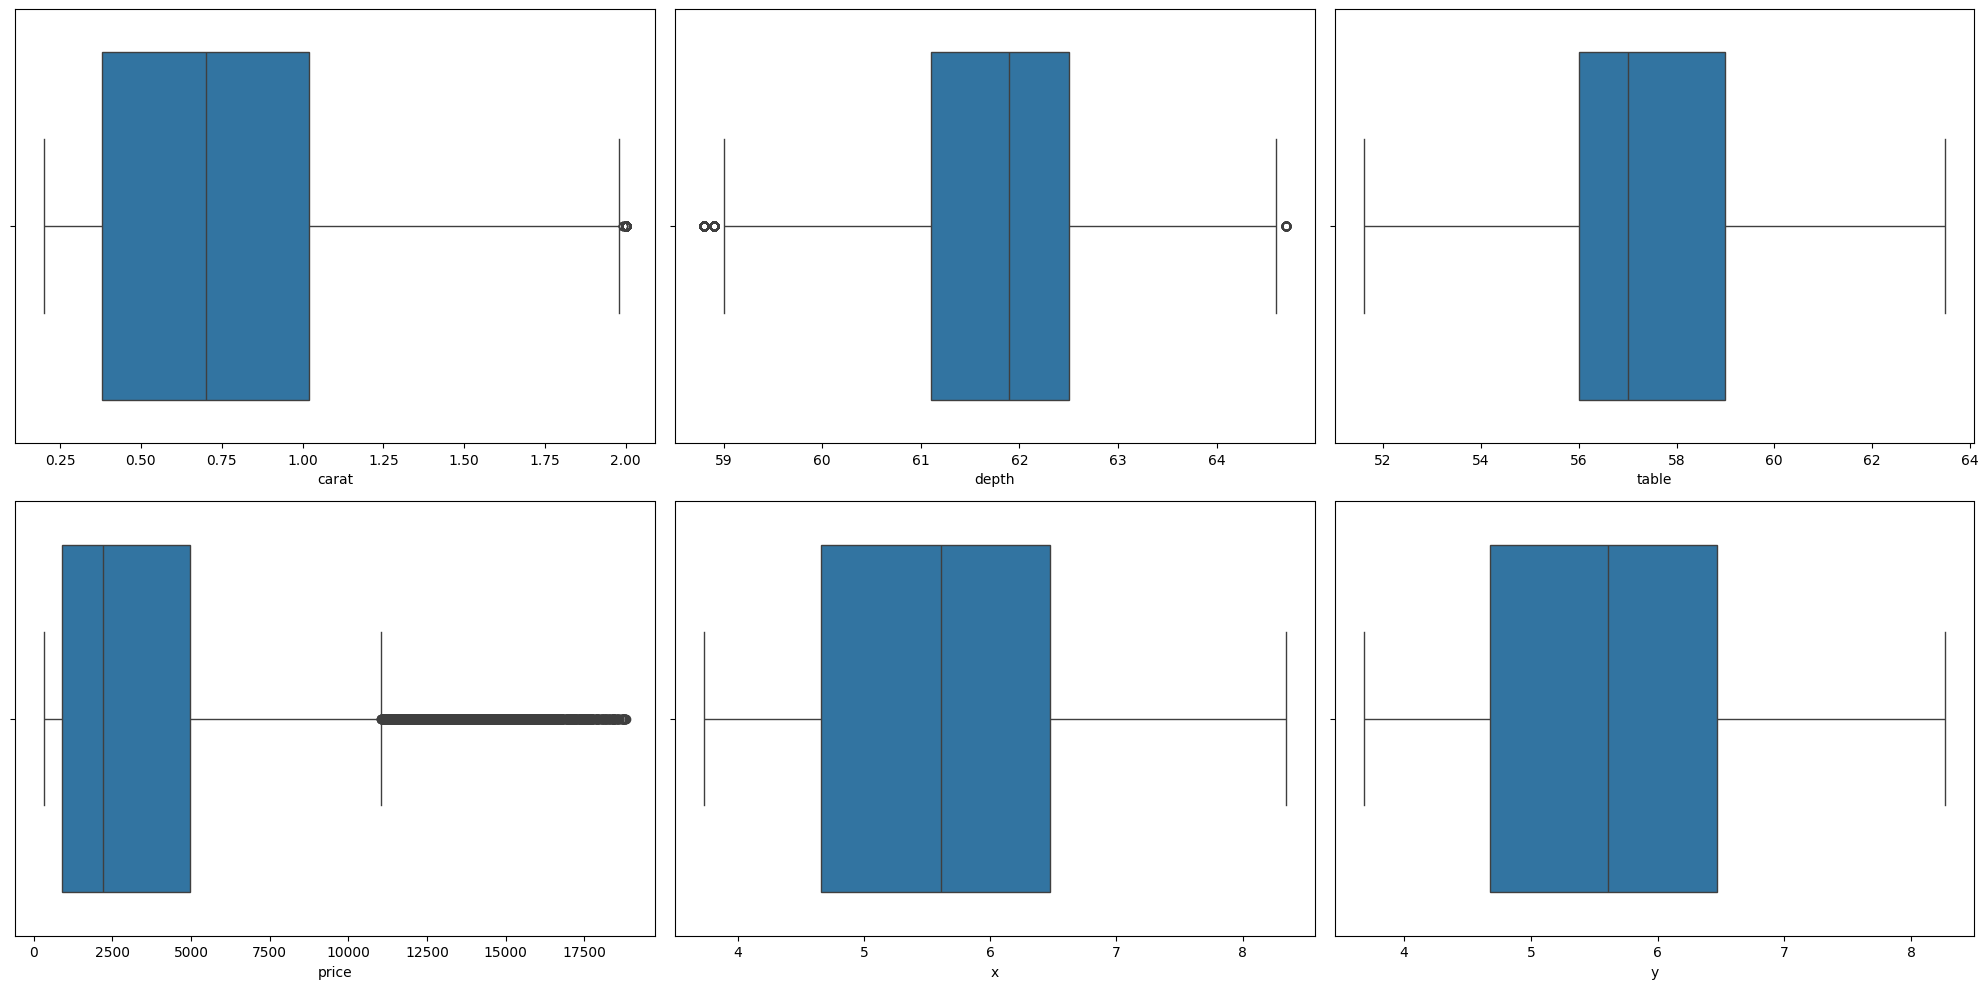

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# daftar fitur kecuali price
features = df_diamonds.columns.to_list()
categorical_features = ['cut','color','clarity']
target_feature = 'price'
numerical_features = [feature for feature in features if feature not in (categorical_features or target_feature)]
print(numerical_features)

# boxplot
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df_diamonds, ax=ax)

# atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


In [15]:
# drop outlier menggunakan IQR
# hanya kolom numerik yang bisa dihitung IQR
q1 = df_diamonds[numerical_features].quantile(0.25) 
q3 = df_diamonds[numerical_features].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

df_diamonds = df_diamonds[~((df_diamonds[numerical_features] < batas_bawah) | (df_diamonds[numerical_features] > batas_atas)).any(axis=1)]
df_diamonds.shape


(49304, 10)

In [16]:
def analysis_categorical_feature(df, feature, ax):
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    new_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(new_df)
    print(count.index[0])
    print(count.values)
    sns.barplot(x=count.index, y=count.values, ax=ax)
    # ax[iteration].count.plot(kind='bar', title=feature)

           jumlah sampel  persentase
cut                                 
Ideal              21052        42.7
Premium            12679        25.7
Very Good          11389        23.1
Good                3847         7.8
Fair                 337         0.7
Ideal
[21052 12679 11389  3847   337]
       jumlah sampel  persentase
color                           
G              10597        21.5
E               9190        18.6
F               8853        18.0
H               7417        15.0
D               6411        13.0
I               4577         9.3
J               2259         4.6
G
[10597  9190  8853  7417  6411  4577  2259]
         jumlah sampel  persentase
clarity                           
SI1              11884        24.1
VS2              11495        23.3
VS1               7739        15.7
SI2               7502        15.2
VVS2              4891         9.9
VVS1              3573         7.2
IF                1747         3.5
I1                 473         1.0
SI1
[11884

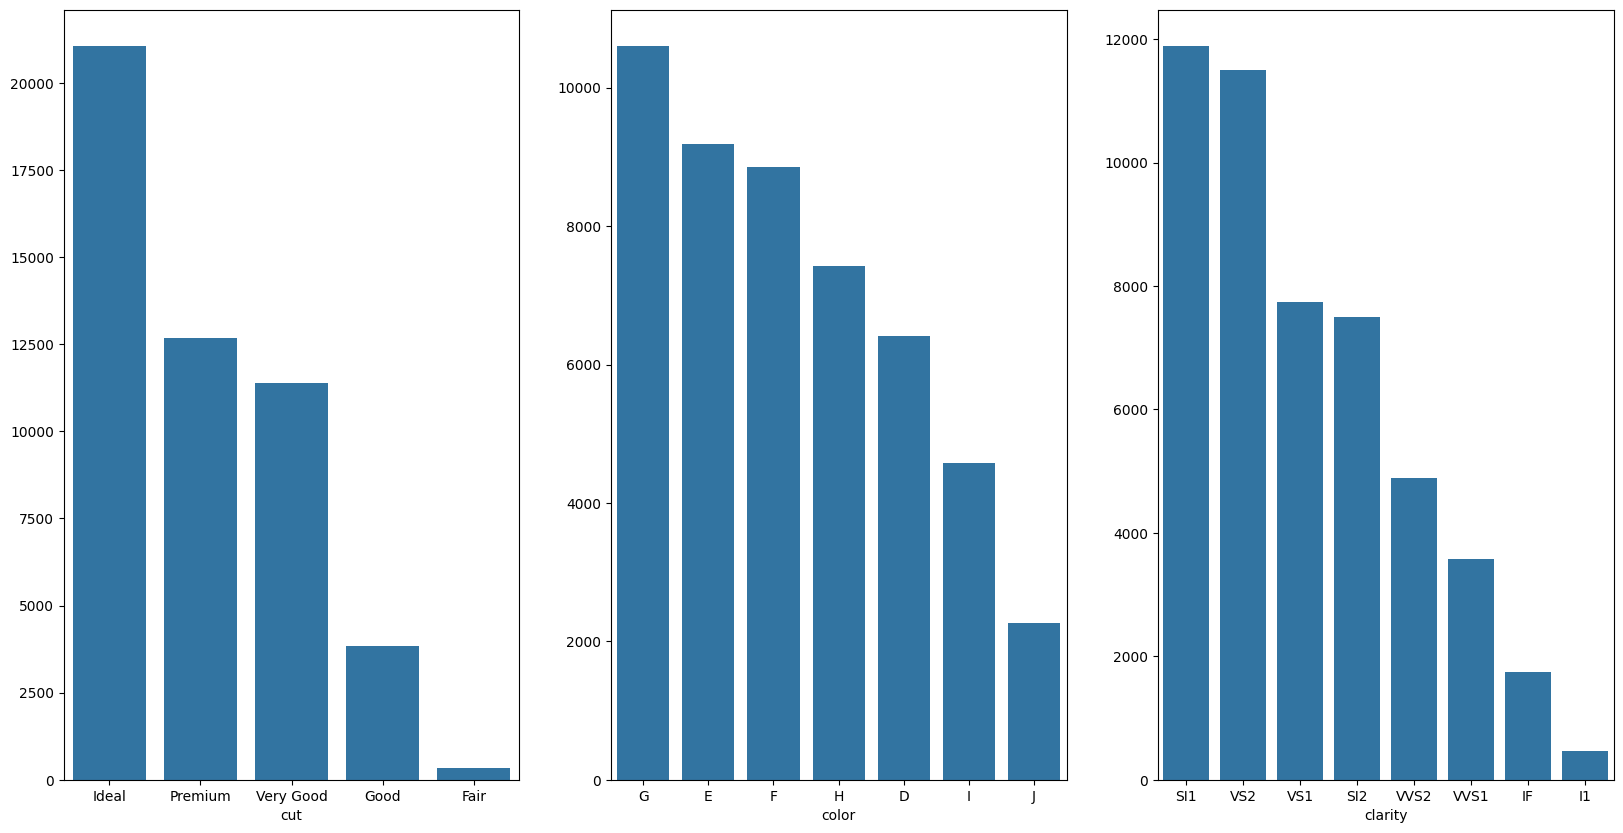

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, ax in enumerate(axes):
    
    analysis_categorical_feature(df_diamonds, categorical_features[i], ax)
plt.show()

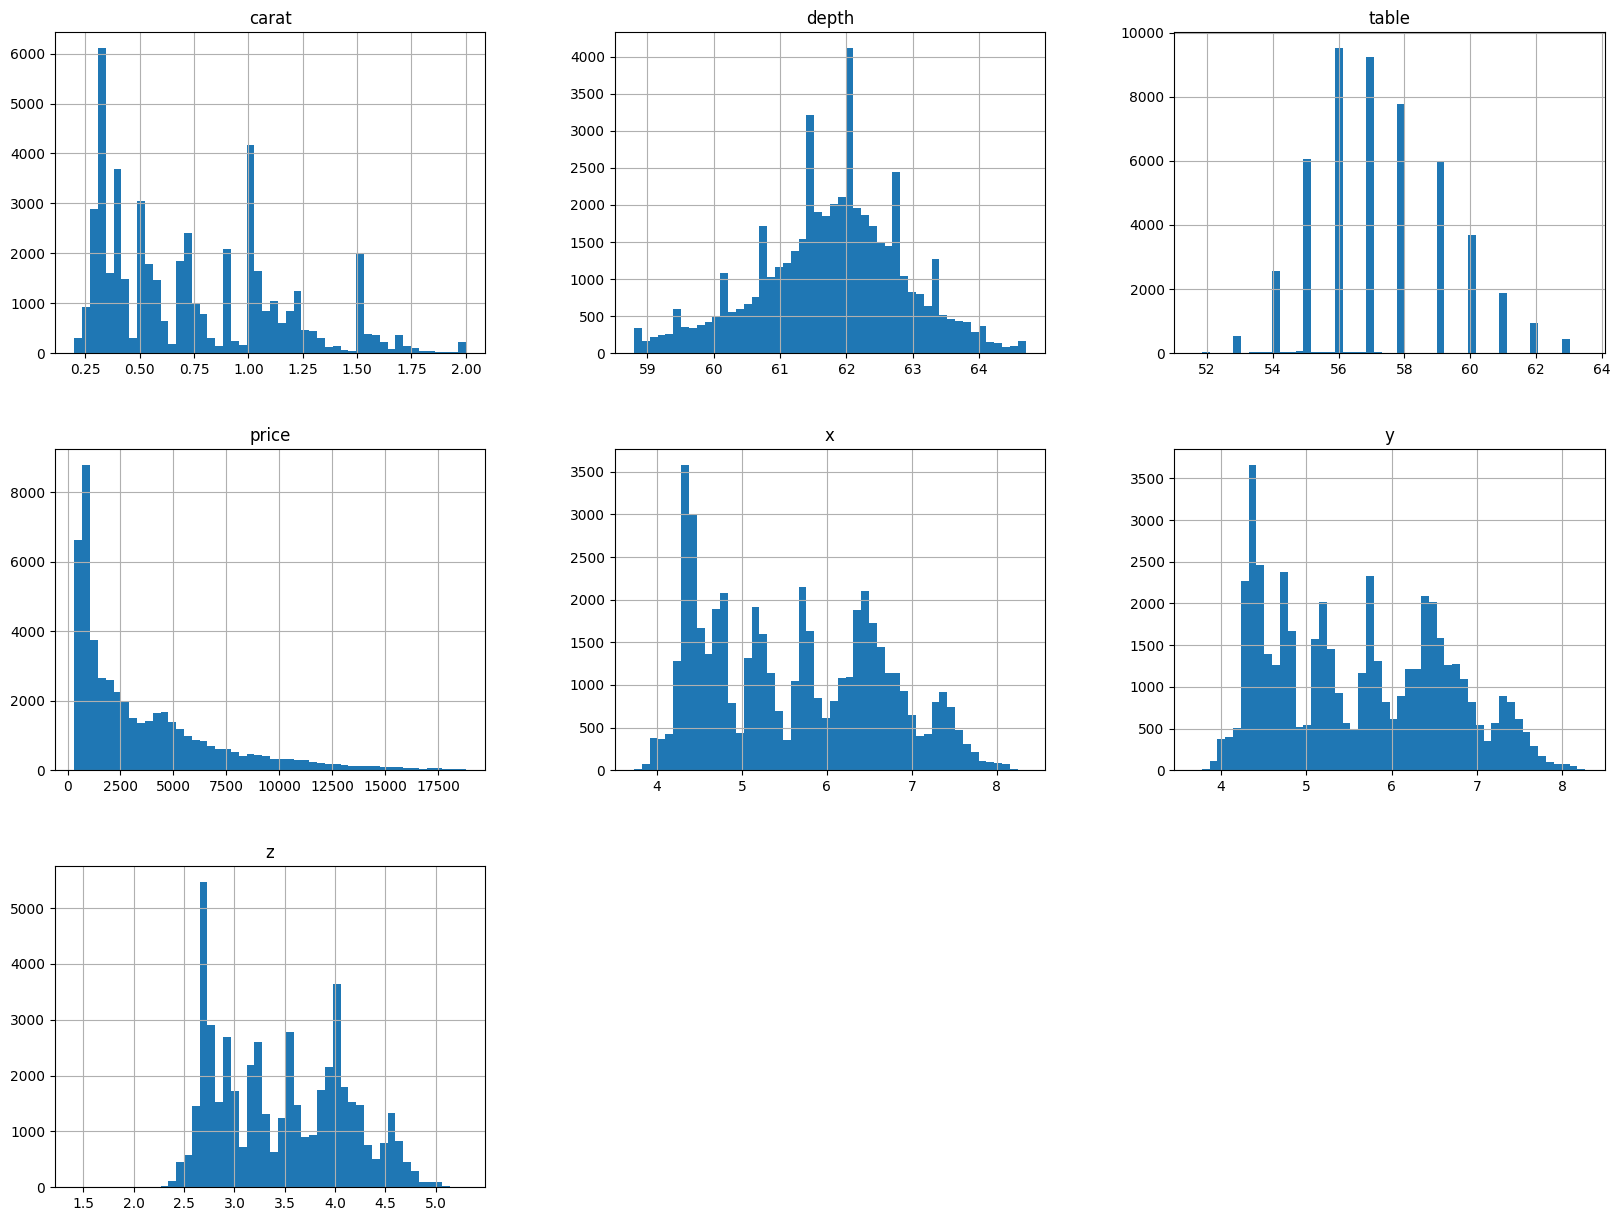

In [18]:
df_diamonds.hist(bins=50, figsize=(20,15))
plt.show()

['carat', 'depth', 'table', 'x', 'y', 'z']


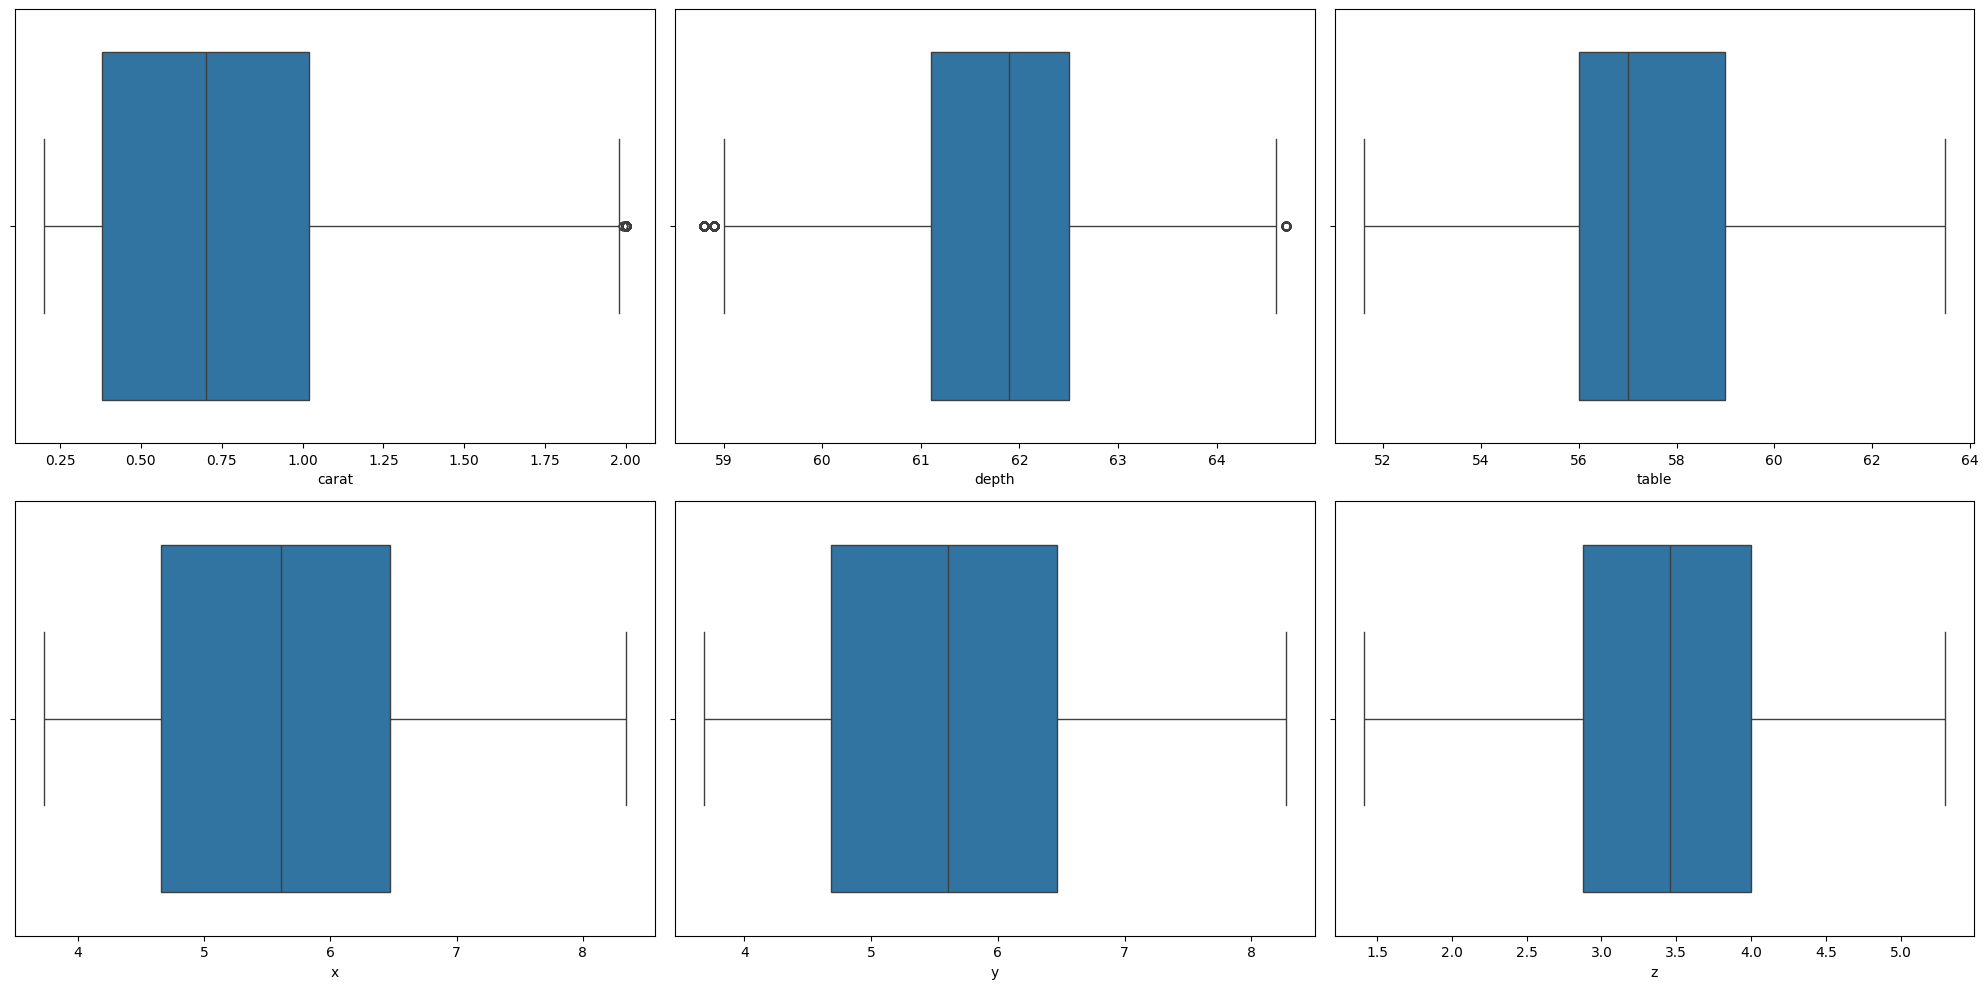

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# daftar fitur kecuali price
features = df_diamonds.columns.to_list()
categorical_features = ['cut','color','clarity','price']
target_feature = 'price'
numerical_features = [feature for feature in features if feature not in (categorical_features or target_feature)]
print(numerical_features)

# boxplot
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df_diamonds, ax=ax)

# atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

C:\Users\ubaid\AppData\Local\Temp\ipykernel_23396\3623243489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_diamonds, palette='viridis')
C:\Users\ubaid\AppData\Local\Temp\ipykernel_23396\3623243489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_diamonds, palette='viridis')
C:\Users\ubaid\AppData\Local\Temp\ipykernel_23396\3623243489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplo

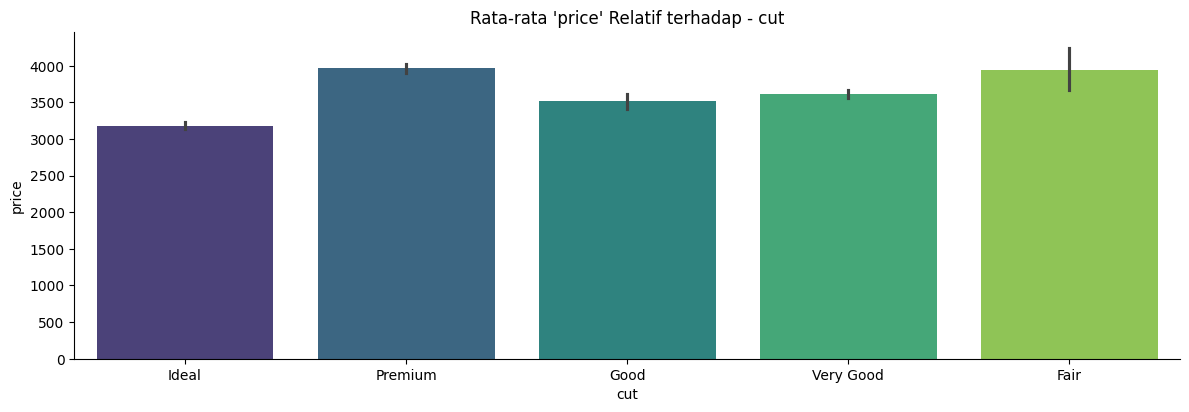

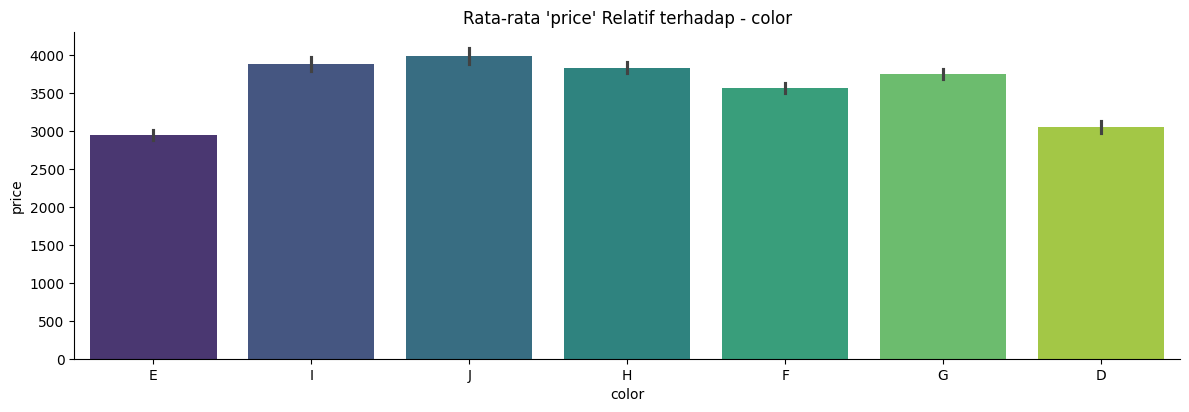

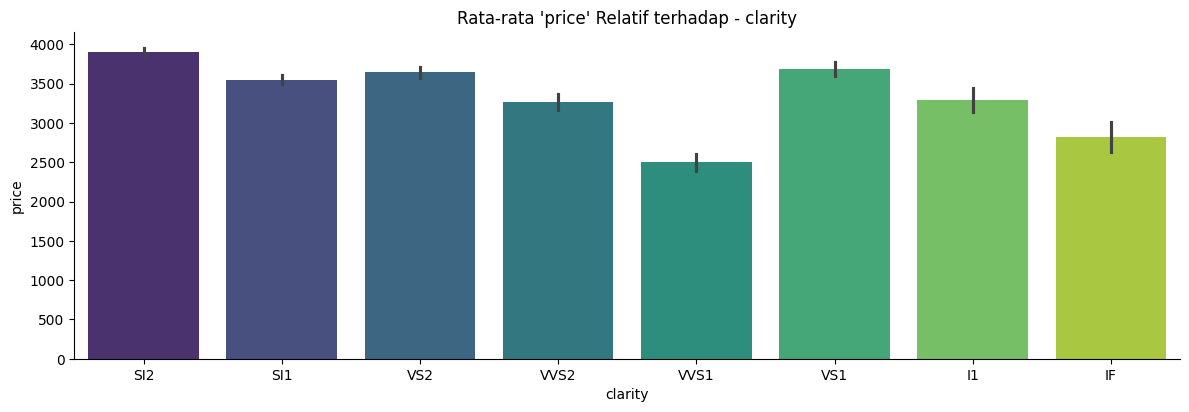

In [24]:
# Cek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

for col in categorical_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_diamonds, palette='viridis')
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

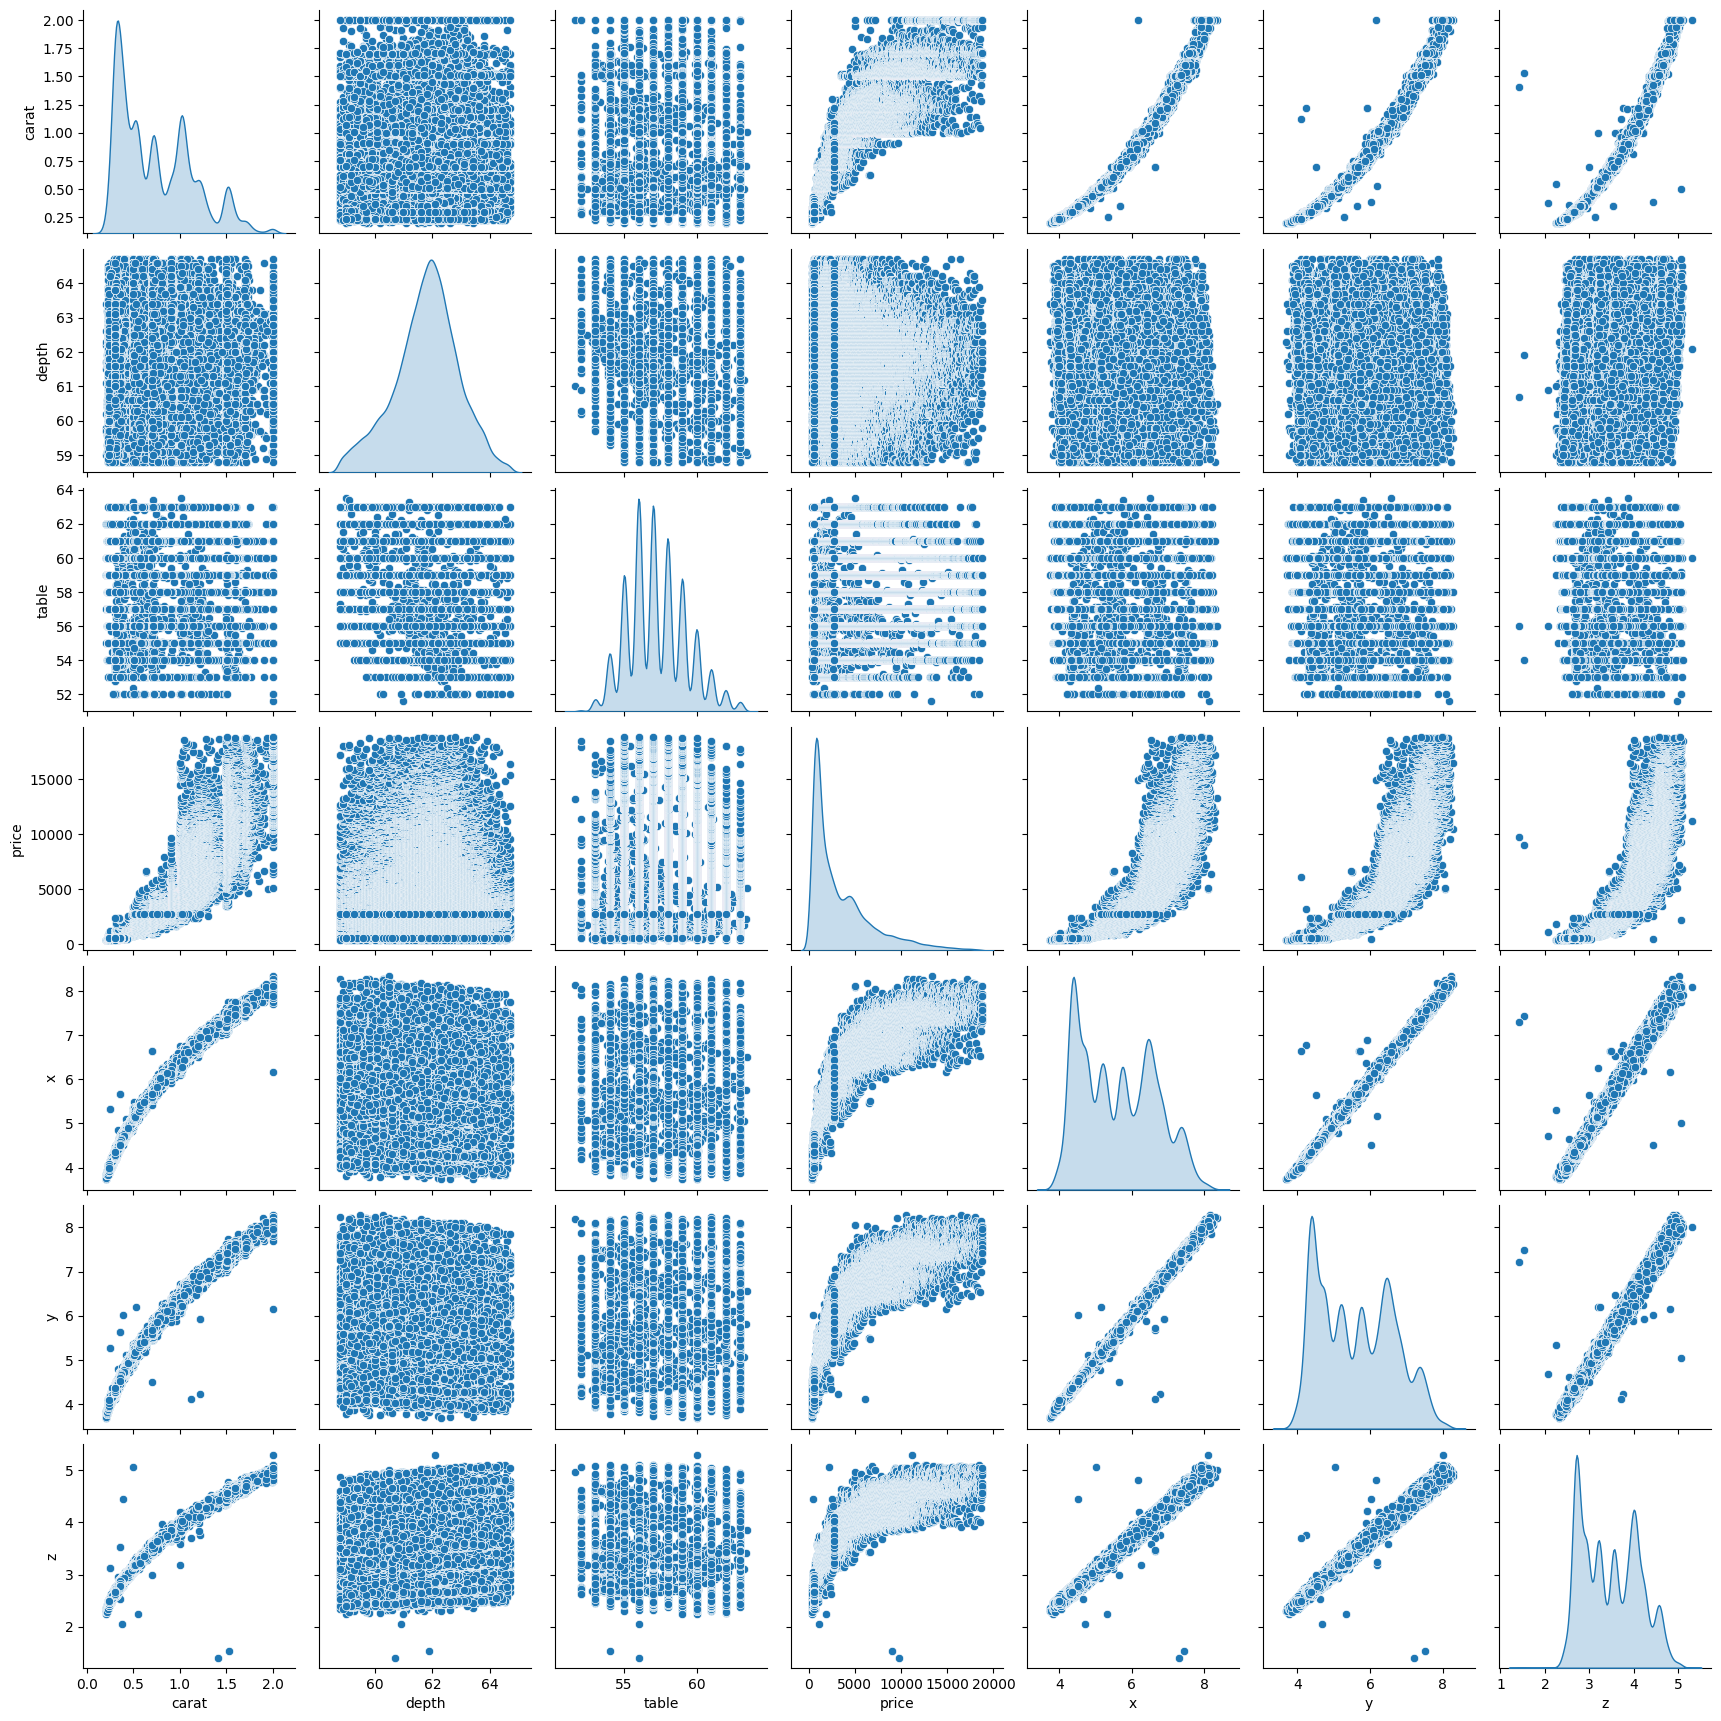

In [25]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_diamonds, diag_kind = 'kde')


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

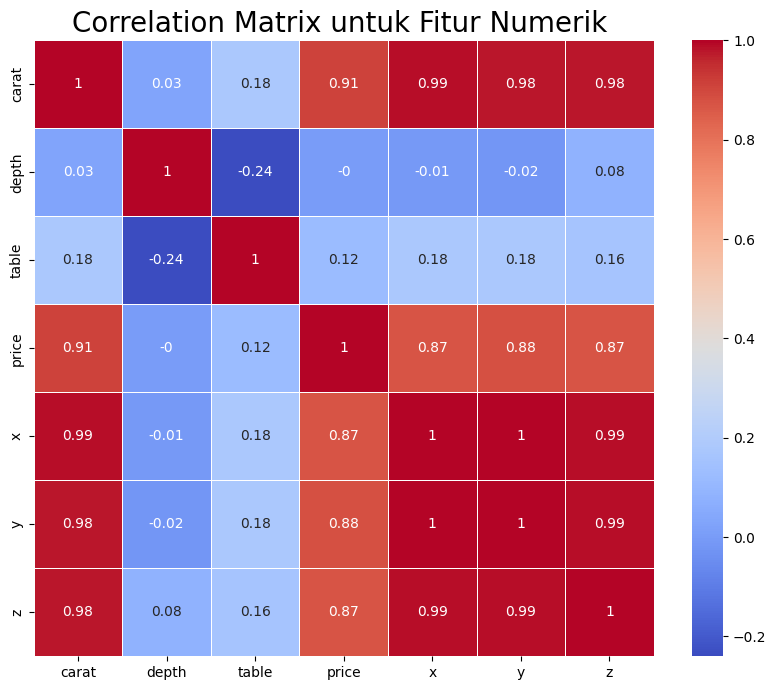

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_diamonds[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
df_diamonds.drop(['depth'], axis=1, inplace=True)

In [31]:
from sklearn.preprocessing import  OneHotEncoder
df_diamonds = pd.concat([df_diamonds, pd.get_dummies(df_diamonds['cut'], prefix='cut')],axis=1)
df_diamonds = pd.concat([df_diamonds, pd.get_dummies(df_diamonds['color'], prefix='color')],axis=1)
df_diamonds = pd.concat([df_diamonds, pd.get_dummies(df_diamonds['clarity'], prefix='clarity')],axis=1)
df_diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
df_diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,61.0,326,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.29,58.0,334,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,58.0,335,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,57.0,336,3.94,3.96,2.48,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
